# MYNTRA FASHION PRODUCT ANALYSIS
 -- By: Roshani Srivastava
 

## Overview : Myntra(Online Fashion Stores)
- Company Ethos : A Fashion & Lifestyle Company
- Parent Company : Flipkart-Walmart
- CEO : Mr. Aman Nagaram
- Target Segment : Mass premium, Urban 18-35 yrs. Men + Women
- Categories : Home, Beauty & Lifestyle Products

## About Myntra :
- Products : 5L+
- Brands : 5000+
- Sellers : 2000+
- Return policy : 15 days
- App store download : 50M+
- App store rating : 4.4

### When it comes to shopping it goes without saying that girls are the best shoppers. Is it true or not ? Let’s find out.
Here we will take a part of the Myntra fashion product data and try to find some insights.

#### Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#### Importing Dataset

In [2]:
df = pd.read_csv("D:\Myntra fashions\Myntra-Fashion-Product-Analysis-main\myntra_products_catalog.csv")

Lets have a look at Dataset

In [3]:
df.head()

,ProductID,ProductName,ProductBrand,Gender,Price (INR),NumImages,Description,PrimaryColor
0,10017413,DKNY Unisex Black & Grey Printed Medium Trolle...,DKNY,Unisex,11745,7,"Black and grey printed medium trolley bag, sec...",Black
1,10016283,EthnoVogue Women Beige & Grey Made to Measure ...,EthnoVogue,Women,5810,7,Beige & Grey made to measure kurta with churid...,Beige
2,10009781,SPYKAR Women Pink Alexa Super Skinny Fit High-...,SPYKAR,Women,899,7,Pink coloured wash 5-pocket high-rise cropped ...,Pink
3,10015921,Raymond Men Blue Self-Design Single-Breasted B...,Raymond,Men,5599,5,Blue self-design bandhgala suitBlue self-desig...,Blue
4,10017833,Parx Men Brown & Off-White Slim Fit Printed Ca...,Parx,Men,759,5,"Brown and off-white printed casual shirt, has ...",White


In [4]:
df.info

<bound method DataFrame.info of        ProductID                                        ProductName  \
0       10017413  DKNY Unisex Black & Grey Printed Medium Trolle...   
1       10016283  EthnoVogue Women Beige & Grey Made to Measure ...   
2       10009781  SPYKAR Women Pink Alexa Super Skinny Fit High-...   
3       10015921  Raymond Men Blue Self-Design Single-Breasted B...   
4       10017833  Parx Men Brown & Off-White Slim Fit Printed Ca...   
...          ...                                                ...   
12486   10262843  Pepe Jeans Men Black Hammock Slim Fit Low-Rise...   
12487   10261721                 Mochi Women Gold-Toned Solid Heels   
12488   10261607  612 league Girls Navy Blue & White Printed Reg...   
12489   10266621  Bvlgari Men Aqva Pour Homme Marine Eau de Toil...   
12490   10265199  Pepe Jeans Men Black & Grey Striped Polo Colla...   

      ProductBrand  Gender  Price (INR)  NumImages  \
0             DKNY  Unisex        11745          7   
1      

Now will check if there is any null values present in dataset


In [5]:
df.isnull().sum()

ProductID         0
ProductName       0
ProductBrand      0
Gender            0
Price (INR)       0
NumImages         0
Description       0
PrimaryColor    894
dtype: int64

Now we saw 'PrimaryColor' is the only column which has null values, will fill that null values with 'others' 

In [6]:
#Now the null values in primary colors is filled with 'other'
df['PrimaryColor'] = df['PrimaryColor'].fillna('Other')

In [7]:
#converting all strings in dataframe to lowercase
df = df.applymap(lambda s:s.lower() if type(s) == str else s)

In [8]:
#Removing leading spaces in primary color column
df['PrimaryColor'] = df['PrimaryColor'].str.lstrip()

Now will check for the various brands availability

In [9]:
print("various brands available: ",df.ProductBrand.unique())

various brands available:  ['dkny' 'ethnovogue' 'spykar' 'raymond' 'parx' 'showoff' 'kenneth cole'
 'police' 'vishudh' 'being human' 'homesake' 'sej by nisha gupta'
 'yak yak' 'parfait' 'michael kors' 'highlander' 'jewel junction' 'id'
 'story@home' 'gini and jony' 'sera' 'accessher' 'alcis'
 'difference of opinion' 'tokyo talkies' 'anna sui' 'her by invictus'
 'soie' 'lara karen' 'urban dog' 'ahilya' 'vastramay' 'campus sutra'
 'fido dido' 'miah decor' 'buckleup' 'peter england' 'aigner' 'lady lyka'
 'park avenue' 'roadster' 'u.s. polo assn. denim co.' 'sweet dreams'
 'kazo' 'stylo bug' 'bvlgari' 'qraa men' 'gas' 'with' 'zush'
 'jbn creation' 'u.s. polo assn. kids' 'dressberry' 'colorplus' 'lakme'
 'allen solly woman' 'palm tree' 'arrow' 'david beckham' 'mango' 'carrera'
 'romee' 'tayhaa' 'ishin' 'shoe couture' 'harbornbay' 'keds' 'rozia'
 'aj dezines' 'monte carlo' 'even' 'ether' 'crimsoune club'
 'russell athletic' 'mimosa' 'puma' 'blackberrys' 'playdate' 'rocia'
 'marvel by wear yo

In [10]:
number_of_unique_brands = len(pd.unique(df['ProductBrand']))
number_of_unique_brands

677

Now will checkout for the different categories present in gender column

In [11]:
print("Categories in Gender: ",df.Gender.unique())

Categories in Gender:  ['unisex' 'women' 'men' 'boys' 'girls' 'unisex kids']


Now next will checkout for the different color options available

In [12]:
print("\n Categories in PrimaryColor: ",df.PrimaryColor.unique())


 Categories in PrimaryColor:  ['black' 'beige' 'pink' 'blue' 'white' 'brown' 'burgundy' 'red' 'green'
 'other' 'maroon' 'navy' 'gold' 'yellow' 'grey' 'platinum' 'silver'
 'khaki' 'mustard' 'lavender' 'matte' 'rose' 'charcoal' 'purple' 'orange'
 'peach' 'magenta' 'bronze']


Next lets checkout the price range available on myntra

In [13]:
print("max price: ",df['Price (INR)'].max())
print("min price: ",df['Price (INR)'].min())
print("mean price: ",df['Price (INR)'].mean())

max price:  63090
min price:  90
mean price:  1452.6609558882396


### Data Visualisation

#### Top 10 Brands

<AxesSubplot:title={'center':'Top 10 Popular Brands'}>

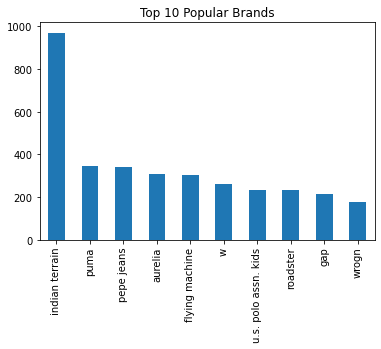

In [14]:
df.ProductBrand.value_counts()[:10].plot(kind = 'bar', title = "Top 10 Popular Brands")

#### Top 10 Expensive Brands

<AxesSubplot:xlabel='ProductBrand'>

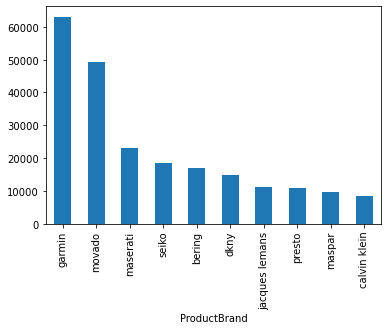

In [15]:
df1=df.groupby('ProductBrand')['Price (INR)'].mean().sort_values(ascending=False).head(10)
df1.plot.bar()

#### Lets see which product belongs to which category according to gender

<AxesSubplot:ylabel='ProductID'>

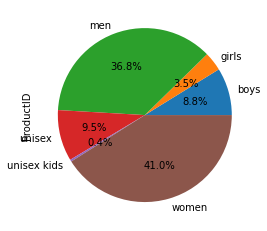

In [16]:
df.groupby('Gender')['ProductID'].count().plot.pie(autopct = "%1.1f%%")

##### Insight: Most of the product category in data belongs to women

### Most Preferable color

<AxesSubplot:xlabel='PrimaryColor'>

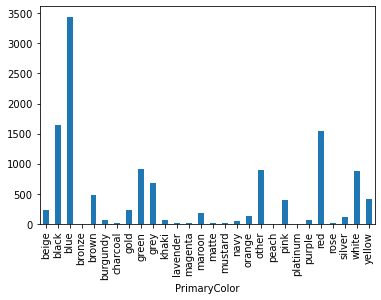

In [17]:
df.groupby('PrimaryColor')['ProductID'].count().plot.bar()

Also Created a Power BI report for Visualisations